In [1]:
import tensorflow as tf

print("GPU disponível:", tf.config.list_physical_devices('GPU'))

GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

dataset_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/"

train_generator = train_datagen.flow_from_directory(
    dataset_path + "train/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

val_generator = val_test_datagen.flow_from_directory(
    dataset_path + "val/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    dataset_path + "test/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
EPOCHS = 15

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 906ms/step - accuracy: 0.8192 - loss: 1.0992 - val_accuracy: 0.8750 - val_loss: 0.2190
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 666ms/step - accuracy: 0.9432 - loss: 0.1497 - val_accuracy: 0.8125 - val_loss: 0.3999
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 660ms/step - accuracy: 0.9464 - loss: 0.1343 - val_accuracy: 0.9375 - val_loss: 0.2489
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 664ms/step - accuracy: 0.9516 - loss: 0.1312 - val_accuracy: 0.7500 - val_loss: 0.3801
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 654ms/step - accuracy: 0.9528 - loss: 0.1265 - val_accuracy: 0.8125 - val_loss: 0.3015
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 110s 647ms/step - accuracy: 0.9496 - loss: 0.1375 - val_accuracy: 0.8750 - val_loss: 0.2214
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 663ms/step - accuracy: 0.9498 - loss: 0.1285 - val_accuracy: 0.9375 - val_loss: 0.1506
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 651ms/step - accuracy: 0.9606 - loss: 0.10

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n🔍 Acurácia no conjunto de teste com VGG-16: {test_acc*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.9104 - loss: 0.2872

🔍 Acurácia no conjunto de teste com VGG-16: 90.54%


In [ ]:
from sklearn.metrics import classification_report
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names =["NORMAL", "PNEUMONIA"]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

test_images_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

plt.figure(figsize=(10,5))

for i, img_path in enumerate(test_images_paths):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_label = "PNEUMONIA" if prediction[0][0] > 0.5 else "NORMAL"

    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.imread(img_path), cmap='gray')
    plt.title(f"Previsão: {predicted_label}")
    plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step


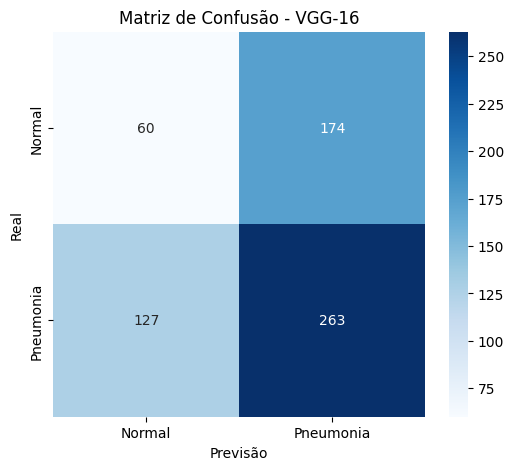

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão - VGG-16")
plt.show()

In [10]:
model.save("modelo_pneumonia_vgg16.h5")
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [11]:
from tensorflow.keras.models import load_model

modelo_carregado = load_model("modelo_pneumonia_vgg16.h5")
print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [12]:
from sklearn.metrics import classification_report
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names =["NORMAL", "PNEUMONIA"]))


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.32      0.26      0.29       234
   PNEUMONIA       0.60      0.67      0.64       390

    accuracy                           0.52       624
   macro avg       0.46      0.47      0.46       624
weighted avg       0.50      0.52      0.50       624



In [17]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Fine-Tuning pronto!")

Fine-Tuning pronto!


In [18]:
EPOCHS_FINE_TUNE = 10

history_fine = model.fit(
    train_generator,
    epochs=EPOCHS_FINE_TUNE,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 109s 621ms/step - accuracy: 0.8983 - loss: 0.4343 - val_accuracy: 0.7500 - val_loss: 0.2897
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 587ms/step - accuracy: 0.9676 - loss: 0.0916 - val_accuracy: 0.6875 - val_loss: 0.3643
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 577ms/step - accuracy: 0.9724 - loss: 0.0750 - val_accuracy: 0.9375 - val_loss: 0.1717
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 582ms/step - accuracy: 0.9814 - loss: 0.0589 - val_accuracy: 1.0000 - val_loss: 0.0951
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 594ms/step - accuracy: 0.9773 - loss: 0.0599 - val_accuracy: 0.8125 - val_loss: 0.4416
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 579ms/step - accuracy: 0.9837 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 582ms/step - accuracy: 0.9783 - loss: 0.0604 - val_accuracy: 0.7500 - val_loss: 0.7530
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 583ms/step - accuracy: 0.9844 - los

In [22]:
model.save("modelo_pneumonia_vgg16_fine_tuned.h5")
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [21]:
from sklearn.metrics import classification_report
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names =["NORMAL", "PNEUMONIA"]))


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.37      0.27      0.31       234
   PNEUMONIA       0.62      0.72      0.67       390

    accuracy                           0.55       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.53      0.55      0.53       624



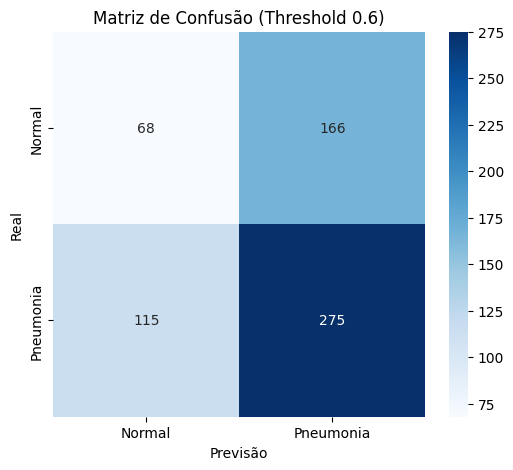

In [19]:
y_pred_adjusted = (y_pred_probs > 0.6).astype(int)

cm_adjusted = confusion_matrix(y_true, y_pred_adjusted)

plt.figure(figsize=(6,5))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão (Threshold 0.6)")
plt.show()